In [158]:
#1. Import Libraries\

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# creating and empty DataFrame:
df = pd.DataFrame()

# loading a CSV file from local device and store it in a pandas DataFrame:
#data_types = {'Density/n(P/Km2)': 'float64'}
df = pd.read_csv('global-data-on-sustainable-energy.csv')#, dtype=data_types)
df['Density/n(P/Km2)'] = df['Density/n(P/Km2)'].replace(',', '', regex=True).astype(float)

In [160]:
#df[0::19] # we Only have 19 countries with a full list and no missing values, this is an issue, So lets see how many missing values we actually have

# View variable characteristics (number of null values, data names, data types)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

<h1>Feature transformations</h1>
<h4>In this section we will transform the NaN or null features and try different values to achieve a better result</h4>

In [161]:
#Get mean values for whole table ignoring NaN values
#this is a test to use nanmean


access = df["Access to electricity (% of population)"]
print(np.nanmean(access))
print("access nanmean = ",np.nanmean(access))
print("access mean = ",np.mean(access))
access

78.93370216207748
access nanmean =  78.93370216207748
access mean =  78.93370216207748


0       1.614
1       4.075
2       9.409
3      14.739
4      20.065
        ...  
3644   42.562
3645   44.179
3646   45.573
3647   46.781
3648   52.748
Name: Access to electricity (% of population), Length: 3649, dtype: float64

In [162]:
#Get mean values for whole table ignoring NaN values


renewPerCapita = df["Renewable-electricity-generating-capacity-per-capita"]
print("renewPerCapita nanmean = ",np.nanmean(renewPerCapita))
print("renewPerCapita mean = ",np.mean(renewPerCapita))
renewPerCapita

 

renewPerCapita nanmean =  113.13749816041205
renewPerCapita mean =  113.13749816041205


0       9.220
1       8.860
2       8.470
3       8.090
4       7.750
        ...  
3644   62.880
3645   62.330
3646   82.530
3647   81.400
3648   80.610
Name: Renewable-electricity-generating-capacity-per-capita, Length: 3649, dtype: float64

In [163]:
pd.options.display.float_format = '{:,.3f}'.format

val = df.mean(axis=0,numeric_only=True,skipna=True)
val

#these are the avg values for each column


Year                                                                    2,010.038
Access to electricity (% of population)                                    78.934
Access to clean fuels for cooking                                          63.255
Renewable-electricity-generating-capacity-per-capita                      113.137
Financial flows to developing countries (US $)                     94,224,000.000
Renewable energy share in the total final energy consumption (%)           32.638
Electricity from fossil fuels (TWh)                                        70.365
Electricity from nuclear (TWh)                                             13.450
Electricity from renewables (TWh)                                          23.968
Low-carbon electricity (% electricity)                                     36.801
Primary energy consumption per capita (kWh/person)                     25,743.982
Energy intensity level of primary energy (MJ/$2017 PPP GDP)                 5.307
Value_co2_emissi

In [164]:
#lets fill the nan values with average values for each column

df_filled_with_averages = df.fillna(df.mean())

print(df_filled_with_averages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 7   Electricity from fossil fuels (TW

C:\Users\Surface\AppData\Local\Temp\ipykernel_919020\2489947689.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_with_averages = df.fillna(df.mean())


In [165]:
#print(df_filled_with_averages['Density/n(P/Km2)'].unique())

In [166]:
#lets run some tests
#I want to be able to separate the df based on a year cutoff since this is a time series
print(df["Year"].unique())

train_percent = 0.6#train percentage will be in range 0.5 to 0.85 so we have a minimum of 3 test data 
#every 0.5 train_percent advances 1 year from our scale

min_year = df["Year"].unique().min()
max_year = df["Year"].unique().max()

time_between = max_year - min_year
 
train_cutoff = int(min_year + train_percent * time_between)


train = df[df['Year'] <= train_cutoff]  # Train data: Year <= 2015
test = df[df['Year'] > train_cutoff]   # Test data: Year > 2015

train["Year"].max()

#from here we can separate the values based on year, Time series Achieved!
#Also we can use a similar method to separate df by country!
#so lets ignore this test and do the group separation


[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]


2012

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#for now lets ignore country since we are making a prediction based on

for i in np.arange(0.5, 0.9, 0.05):#from 0.2 to 0.85 in increments of 0.05 mean in this case the range of our year
    train_cutoff = int(min_year + i * time_between)
    # print(train_cutoff)#shows range from 2010 to 2017, so working!
    train = df_filled_with_averages[df_filled_with_averages['Year'] <= train_cutoff]
    test = df_filled_with_averages[df_filled_with_averages['Year'] > train_cutoff]
    
    # print(train["Year"].info())# Confirming it works properly
    #now we create our train and test dfs based on the new split, maybe I can later find a more elegant method
    X_train = train.drop(columns=['Renewable energy share in the total final energy consumption (%)', 'Entity'])
    y_train = train["Renewable energy share in the total final energy consumption (%)"]
    X_test = test.drop(columns=['Renewable energy share in the total final energy consumption (%)', 'Entity'])
    y_test = test["Renewable energy share in the total final energy consumption (%)"]
    
    
    my_linreg = LinearRegression()
    my_linreg.fit(X_train, y_train)
    y_prediction = my_linreg.predict(X_test)

    # print(y_prediction)
    
    # Calculating "Mean Square Error" (MSE):
    mse = metrics.mean_squared_error(y_test, y_prediction)

    # Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
    rmse = np.sqrt(mse)

    print("cutoff = ", train_cutoff,", rmse = ",rmse)
    
    # print(X_test.shape)



cutoff =  2010 , rmse =  14.87752009841249
cutoff =  2011 , rmse =  14.916835082896897
cutoff =  2012 , rmse =  15.02697796784949
cutoff =  2013 , rmse =  15.210338557094962
cutoff =  2014 , rmse =  15.459599561679768
cutoff =  2015 , rmse =  15.862783876242894
cutoff =  2016 , rmse =  16.45743758210688
cutoff =  2017 , rmse =  17.474606800239975


As you can see out rmse is Quite bad. and the lower the cuttoff the better... meaning that its almost a guess at this point our prediction.

So lets now separate per country, while we wont have much data to train, we might have better results


In [168]:
# #Now lets try a basic logreg using these values
# #for this, lets first try a few different train test splits

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# # Lists to store results
# test_sizes = []
# accuracies = []

# # Iterate through different test sizes
# for i in np.arange(0.5,1,0.05):
#     test_sizes.append(i)
    
    
#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(df_features, Re_Percent, test_size=i, random_state=5)

#     # Train logistic regression model
#     model = LogisticRegression(max_iter=1000)
#     model.fit(X_train, y_train)
    
#     # Evaluate accuracy
#     accuracy = model.score(X_test, y_test)
#     accuracies.append(accuracy)

# # Find the best test size based on highest accuracy
# best_test_size = test_sizes[accuracies.index(max(accuracies))]
# best_accuracy = max(accuracies)

# print(f"Best test size: {best_test_size} with accuracy: {best_accuracy}")


<h1>Messing with DF tables of country</h1>

<h1>Ignore this section for now</h1>

In [169]:
df_list = [d for _, d in df.groupby(['Entity'])]#separate values by country into their own smaller tables

C:\Users\Surface\AppData\Local\Temp\ipykernel_919020\1217132406.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df_list = [d for _, d in df.groupby(['Entity'])]#separate values by country into their own smaller tables


In [170]:
test_df = pd.DataFrame()

for i in range(len(df_list)):
    test_df = pd.concat([test_df, df_list[i].head(1)], ignore_index = True)
    test_df.reset_index()
    #test_df = df_list[i].head(1)



In [171]:
test_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density/n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.614,6.200,9.220,"20,000.000",44.990,0.160,0.000,0.310,...,302.595,1.640,760.000,NaN,NaN,NaN,60.000,"652,230.000",33.939,67.710
1,Albania,2000,100.000,38.200,NaN,NaN,NaN,0.140,0.000,4.550,...,"9,029.438",4.130,"3,170.000",NaN,6.946,"1,126.683",105.000,"28,748.000",41.153,20.168
2,Algeria,2000,98.973,97.100,8.910,NaN,0.430,23.840,0.000,0.050,...,"9,746.524",4.180,"80,050.000",0.053,3.800,"1,765.027",18.000,"2,381,741.000",28.034,1.660
3,Angola,2000,24.213,41.100,14.370,NaN,73.440,0.500,0.000,0.900,...,"1,979.256",3.680,"16,200.000",NaN,3.055,556.839,26.000,"1,246,700.000",-11.203,17.874
4,Antigua and Barbuda,2000,97.689,100.000,0.000,NaN,0.000,0.140,0.000,0.000,...,"28,457.223",3.130,330.000,NaN,6.203,"10,872.293",223.000,443.000,17.061,-61.796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Uzbekistan,2000,99.593,83.600,64.430,NaN,0.720,38.510,0.000,5.820,...,"24,053.547",28.200,"123,810.000",2.900,3.835,558.227,79.000,"447,400.000",41.377,64.585
172,Vanuatu,2000,22.143,15.900,3.240,NaN,48.650,0.040,0.000,0.000,...,"1,988.279",3.660,90.000,NaN,5.925,"1,470.636",25.000,"12,189.000",-15.377,166.959
173,Yemen,2000,49.187,55.700,0.000,"1,480,000.000",0.950,3.210,0.000,0.000,...,"3,228.210",2.823,NaN,NaN,NaN,NaN,56.000,"527,968.000",15.553,48.516
174,Zambia,2000,16.700,13.800,173.030,"10,000.000",89.980,0.070,0.000,7.690,...,"2,951.367",12.770,"1,810.000",NaN,3.897,345.690,25.000,"752,618.000",-13.134,27.849


In [172]:
feature_cols = ['Entity', 'Year', 'Renewable energy share in the total final energy consumption (%)']

algeria = df_list[2]
algeria


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density/n(P/Km2),Land Area(Km2),Latitude,Longitude
42,Algeria,2000,98.973,97.100,8.910,NaN,0.430,23.840,0.000,0.050,...,"9,746.524",4.180,"80,050.000",0.053,3.800,"1,765.027",18.000,"2,381,741.000",28.034,1.660
43,Algeria,2001,98.967,97.300,8.790,"810,000.000",0.430,24.960,0.000,0.070,...,"9,961.640",4.070,"78,650.000",0.065,3.000,"1,740.607",18.000,"2,381,741.000",28.034,1.660
44,Algeria,2002,98.953,97.800,8.680,"310,000.000",0.510,25.940,0.000,0.060,...,"10,180.350",4.120,"82,400.002",0.052,5.600,"1,781.829",18.000,"2,381,741.000",28.034,1.660
45,Algeria,2003,98.934,98.000,8.570,"90,000.000",0.470,27.540,0.000,0.260,...,"10,510.461",4.080,"88,190.002",0.228,7.200,"2,103.381",18.000,"2,381,741.000",28.034,1.660
46,Algeria,2004,98.912,98.200,8.460,"140,000.000",0.440,29.140,0.000,0.250,...,"10,759.022",3.960,"89,489.998",0.207,4.300,"2,610.185",18.000,"2,381,741.000",28.034,1.660
47,Algeria,2005,98.890,98.500,8.340,"160,000.000",0.580,31.360,0.000,0.550,...,"11,113.723",3.900,"94,190.002",0.434,5.900,"3,113.095",18.000,"2,381,741.000",28.034,1.660
48,Algeria,2006,98.869,98.700,7.420,NaN,0.410,32.900,0.000,0.220,...,"11,341.980",4.100,"99,809.998",0.163,1.700,"3,478.710",18.000,"2,381,741.000",28.034,1.660
49,Algeria,2007,98.853,98.800,7.300,NaN,0.410,34.750,0.000,0.220,...,"11,759.701",4.210,"102,750.000",0.160,3.400,"3,950.513",18.000,"2,381,741.000",28.034,1.660
50,Algeria,2008,99.300,99.000,6.640,NaN,0.300,37.550,0.000,0.280,...,"12,252.297",4.160,"107,750.000",0.188,2.400,"4,923.632",18.000,"2,381,741.000",28.034,1.660
51,Algeria,2009,98.845,99.100,6.440,"2,190,000.000",0.310,35.910,0.000,0.300,...,"12,753.120",4.480,"112,169.998",0.213,1.600,"3,883.271",18.000,"2,381,741.000",28.034,1.660


ValueError: x and y must have same first dimension, but have shapes (21,) and (1,)

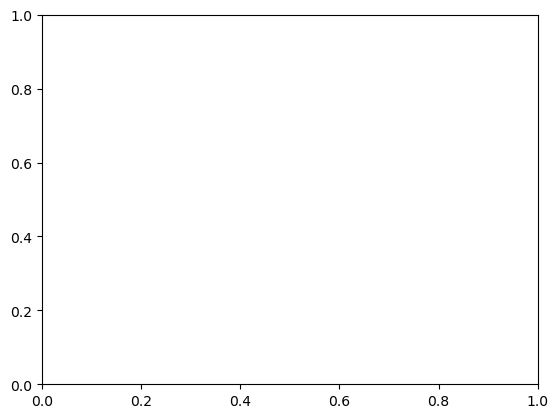

In [173]:
# Data for plotting
t = algeria["Year"]
s = 1

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()